# MACHINE LEARNING APPROACH 

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.

The process of learning begins with observations or data, such as examples, direct experience, or instruction, in order to look for patterns in data and make better decisions in the future based on the examples that we provide. The primary aim is to allow the computers learn automatically without human intervention or assistance and adjust actions accordingly.

In [71]:
#import Libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10) 
import numpy as np                  
import pandas as pd                 
from scipy import stats             
import seaborn as sns               
import warnings
import random
%matplotlib inline 


from datetime import datetime       
random.seed(datetime.now())

#sklearn libraries
from sklearn import cross_validation                                                        
from sklearn.cross_validation import KFold, cross_val_score, train_test_split               
from sklearn import metrics
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [72]:
dataframe = pd.read_csv("uber_lyft_30day.csv")

In [73]:
dataframe.head()

,date_time,uber_distance,uber_duration,uber_estimate,uber_high_estimate,uber_low_estimate,main_temp,weather,uber_price_per_second,lyft_distance,lyft_duration,lyft_max_estimate,lyft_min_estimate,lyft_estimate,lyft_price_per_second,average_duration
0,2018-03-01 00:00:03,1.73,360,7.5,9.0,6.0,46.69,Rain,0.019380,1.76,414,3.40,3.40,3.40,0.008786,387.0
1,2018-03-01 00:01:03,1.90,480,5.5,7.0,4.0,46.69,Rain,0.010816,1.79,537,3.53,3.53,3.53,0.006942,508.5
2,2018-03-01 00:02:03,2.26,420,7.0,9.0,5.0,46.56,Rain,0.015436,2.20,487,3.85,3.85,3.85,0.008490,453.5
3,2018-03-01 00:03:02,1.63,360,7.5,9.0,6.0,46.56,Rain,0.018029,1.70,472,3.46,3.46,3.46,0.008317,416.0
4,2018-03-01 00:04:02,2.17,480,9.5,11.0,8.0,46.56,Rain,0.018393,2.21,553,3.47,3.47,3.47,0.006718,516.5


In [74]:
dataframe.drop(['uber_high_estimate', 'uber_low_estimate', 'lyft_max_estimate', 'lyft_min_estimate'], axis=1, inplace=True)

From the above table we observe that the weather data needs to be converted into numerical format as linear regression does not process categorical data.
So we convert weather data and assign it a numerical label.

In [75]:
dataframe[['weather']] = dataframe["weather"].astype('category')
dataframe['weather_label'] = dataframe["weather"].cat.codes
dataframe.groupby('weather')['weather_label'].unique()
dataframe.set_index('date_time', inplace=True)

In [76]:
# we are trying to predict the future price per second
Prediction_uber = 'uber_price_per_second'
Prediction_lyft = 'lyft_price_per_second'
dataframe['label'] = dataframe[Prediction_uber]
dataframe['label_1'] = dataframe[Prediction_lyft]
uber_pps_X = np.array(dataframe[['uber_distance','uber_duration','lyft_price_per_second','average_duration','weather_label']])
uber_pps_X = preprocessing.scale(uber_pps_X)

lyft_pps_X1 = np.array(dataframe[['lyft_distance','lyft_duration','uber_price_per_second','average_duration','weather_label']])
lyft_pps_X1 = preprocessing.scale(lyft_pps_X1)

##  Define the Training and Testing set 

Data to Train the Model classifier =  80% of our data, 
Data to Test the Model classifier  =   20% of our data
Cross-validation is a statistical method used to estimate the skill of machine learning models.
It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand,and results in skill estimates that generally have a lower bias than other methods.
## K Fold cross validation
The data is divided into k subsets.The holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model.

In [77]:
#Training and Testing set of features and labels. 
uber_pps_y = np.array(dataframe['uber_price_per_second'])
uber_pps_X_train, uber_pps_X_test, uber_pps_y_train, uber_pps_y_test = cross_validation.train_test_split(uber_pps_X, uber_pps_y,test_size=0.20)

lyft_pps_y1 = np.array(dataframe['lyft_price_per_second'])
lyft_pps_X1_train, lyft_pps_X1_test, lyft_pps_y1_train, lyft_pps_y1_test = cross_validation.train_test_split(lyft_pps_X1, lyft_pps_y1, test_size=0.20)

## Linear Regression Model

- Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. 
- One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.
- For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.
- A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).
-The diagram below represents simple linear regression, which has one independent variable
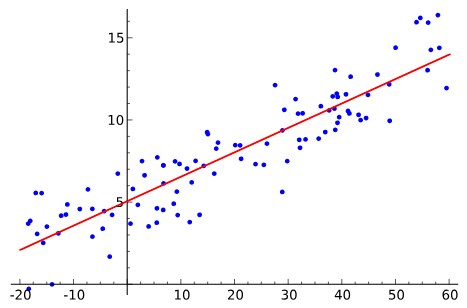

In [78]:
#To predict Uber_price_per_second
regr = LinearRegression()
results = regr.fit(uber_pps_X_train, uber_pps_y_train)
accuracy = regr.score(uber_pps_X_test, uber_pps_y_test)
print("Accuracy - ", accuracy)

#To predict Lyft_price_per_second
results = regr.fit(lyft_pps_X1_train, lyft_pps_y1_train)
accuracy = regr.score(lyft_pps_X1_test, lyft_pps_y1_test)
print("Acuuracy - ", accuracy)

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(uber_pps_X_train, uber_pps_y_train)

# Print the coefficients
print (results.intercept_)
print (results.coef_)

Accuracy -  0.4571764077079735
Acuuracy -  0.2713567311769275
0.014776458449610296
[ 0.00170959  0.0006212   0.00190842 -0.00354313  0.00020313]


In [79]:
# Predicting the features of the dataset
uber_pred = model.predict(uber_pps_X_test)

Result = pd.DataFrame()                 
Result['uber_pred'] = uber_pred     
Result['actual'] = uber_pps_y_test     
 # Finding the precentage error between the predicted values and the actual values
Result['percent_linear_regression_error'] = abs(Result['actual']-Result['uber_pred'])*100/Result['actual']             
train_mean = np.mean(uber_pps_y_train)        
#Baseline prediction - is the average value of dependent variable. So we are taking a mean baseline apporach.
Result['baseline_error'] = abs(Result['actual']-train_mean)*100/Result['actual']
Result.head(n=10)


,uber_pred,actual,percent_linear_regression_error,baseline_error
0,0.022564,0.019627,14.961433,24.713558
1,0.013577,0.010684,27.077333,38.308361
2,0.013980,0.014115,0.954845,4.686062
3,0.014520,0.011814,22.903743,25.072808
4,0.012712,0.013008,2.279498,13.594607
5,0.018130,0.013381,35.494670,10.429966
6,0.010398,0.016095,35.398537,8.191059
7,0.017009,0.017798,4.436987,16.977769
8,0.013026,0.009907,31.478559,49.150643
9,0.012238,0.011700,4.590184,26.290113


In [80]:
print ('Mean Baseline Error: ', Result['baseline_error'].mean())
print ('Mean Regression Error: ', Result['percent_linear_regression_error'].mean())

Mean Baseline Error:  27.229065999531617
Mean Regression Error:  18.55229693784727


- Regression error is less compared to the baseline error, but it is still enough to decrease the accuracy of our future prediction price.

## Random Forest Regression

- The random forest model is a type of additive model that makes predictions by combining decisions from a sequence of base models. 
- More formally we can write this class of models as:

g(x)=f0(x)+f1(x)+f2(x)+...
     
     where the final model g is the sum of simple base models fi. Here, each base classifier is a simple decision tree. This broad technique of using multiple models to obtain better predictive performance is called model ensembling. In random forests, all the base models are constructed independently using a different subsample of the data.

- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

- The Random Forest solves the instability problem using bagging. We simply estimate the desired Regression Tree on many bootstrap samples (re-sample the data many times with replacement and re-estimate the model) and make the final prediction as the average of the predictions across the trees.
- The Random Forest adds a new source of instability to the individual trees. Every time we calculate a new optimal variable-observation point to split the tree, we do not use all variables. Instead, we randomly select 2/3 of the variables. This will make the individual trees even more unstable, but as I mentioned here, bagging benefits from instability.

In [81]:
# 1000 trees in the forest, 
# 18 is the seed for the forest
# Maximumn depth of the trees to be 5.
model = RandomForestRegressor(n_estimators = 1500, random_state = 20, max_depth = 6) 
ouput_random_forest = model.fit(uber_pps_X_train, uber_pps_y_train)
random_forest_predictions = model.predict(uber_pps_X_test)

In [82]:
Result['uber_pred_rf'] = random_forest_predictions  
# Percentage error between the actual and the random forest predicted values.
Result['percent_random_forest_error'] = abs(Result['actual']-Result['uber_pred_rf'])*100/Result['actual']                  
Result.head(n=5)

,uber_pred,actual,percent_linear_regression_error,baseline_error,uber_pred_rf,percent_random_forest_error
0,0.022564,0.019627,14.961433,24.713558,0.021144,7.728994
1,0.013577,0.010684,27.077333,38.308361,0.014239,33.279074
2,0.013980,0.014115,0.954845,4.686062,0.014247,0.937953
3,0.014520,0.011814,22.903743,25.072808,0.014323,21.232769
4,0.012712,0.013008,2.279498,13.594607,0.013252,1.872482


In [83]:
print ('Mean Random Forest Error: ', Result['percent_random_forest_error'].mean())

Mean Random Forest Error:  17.942132196963556


# 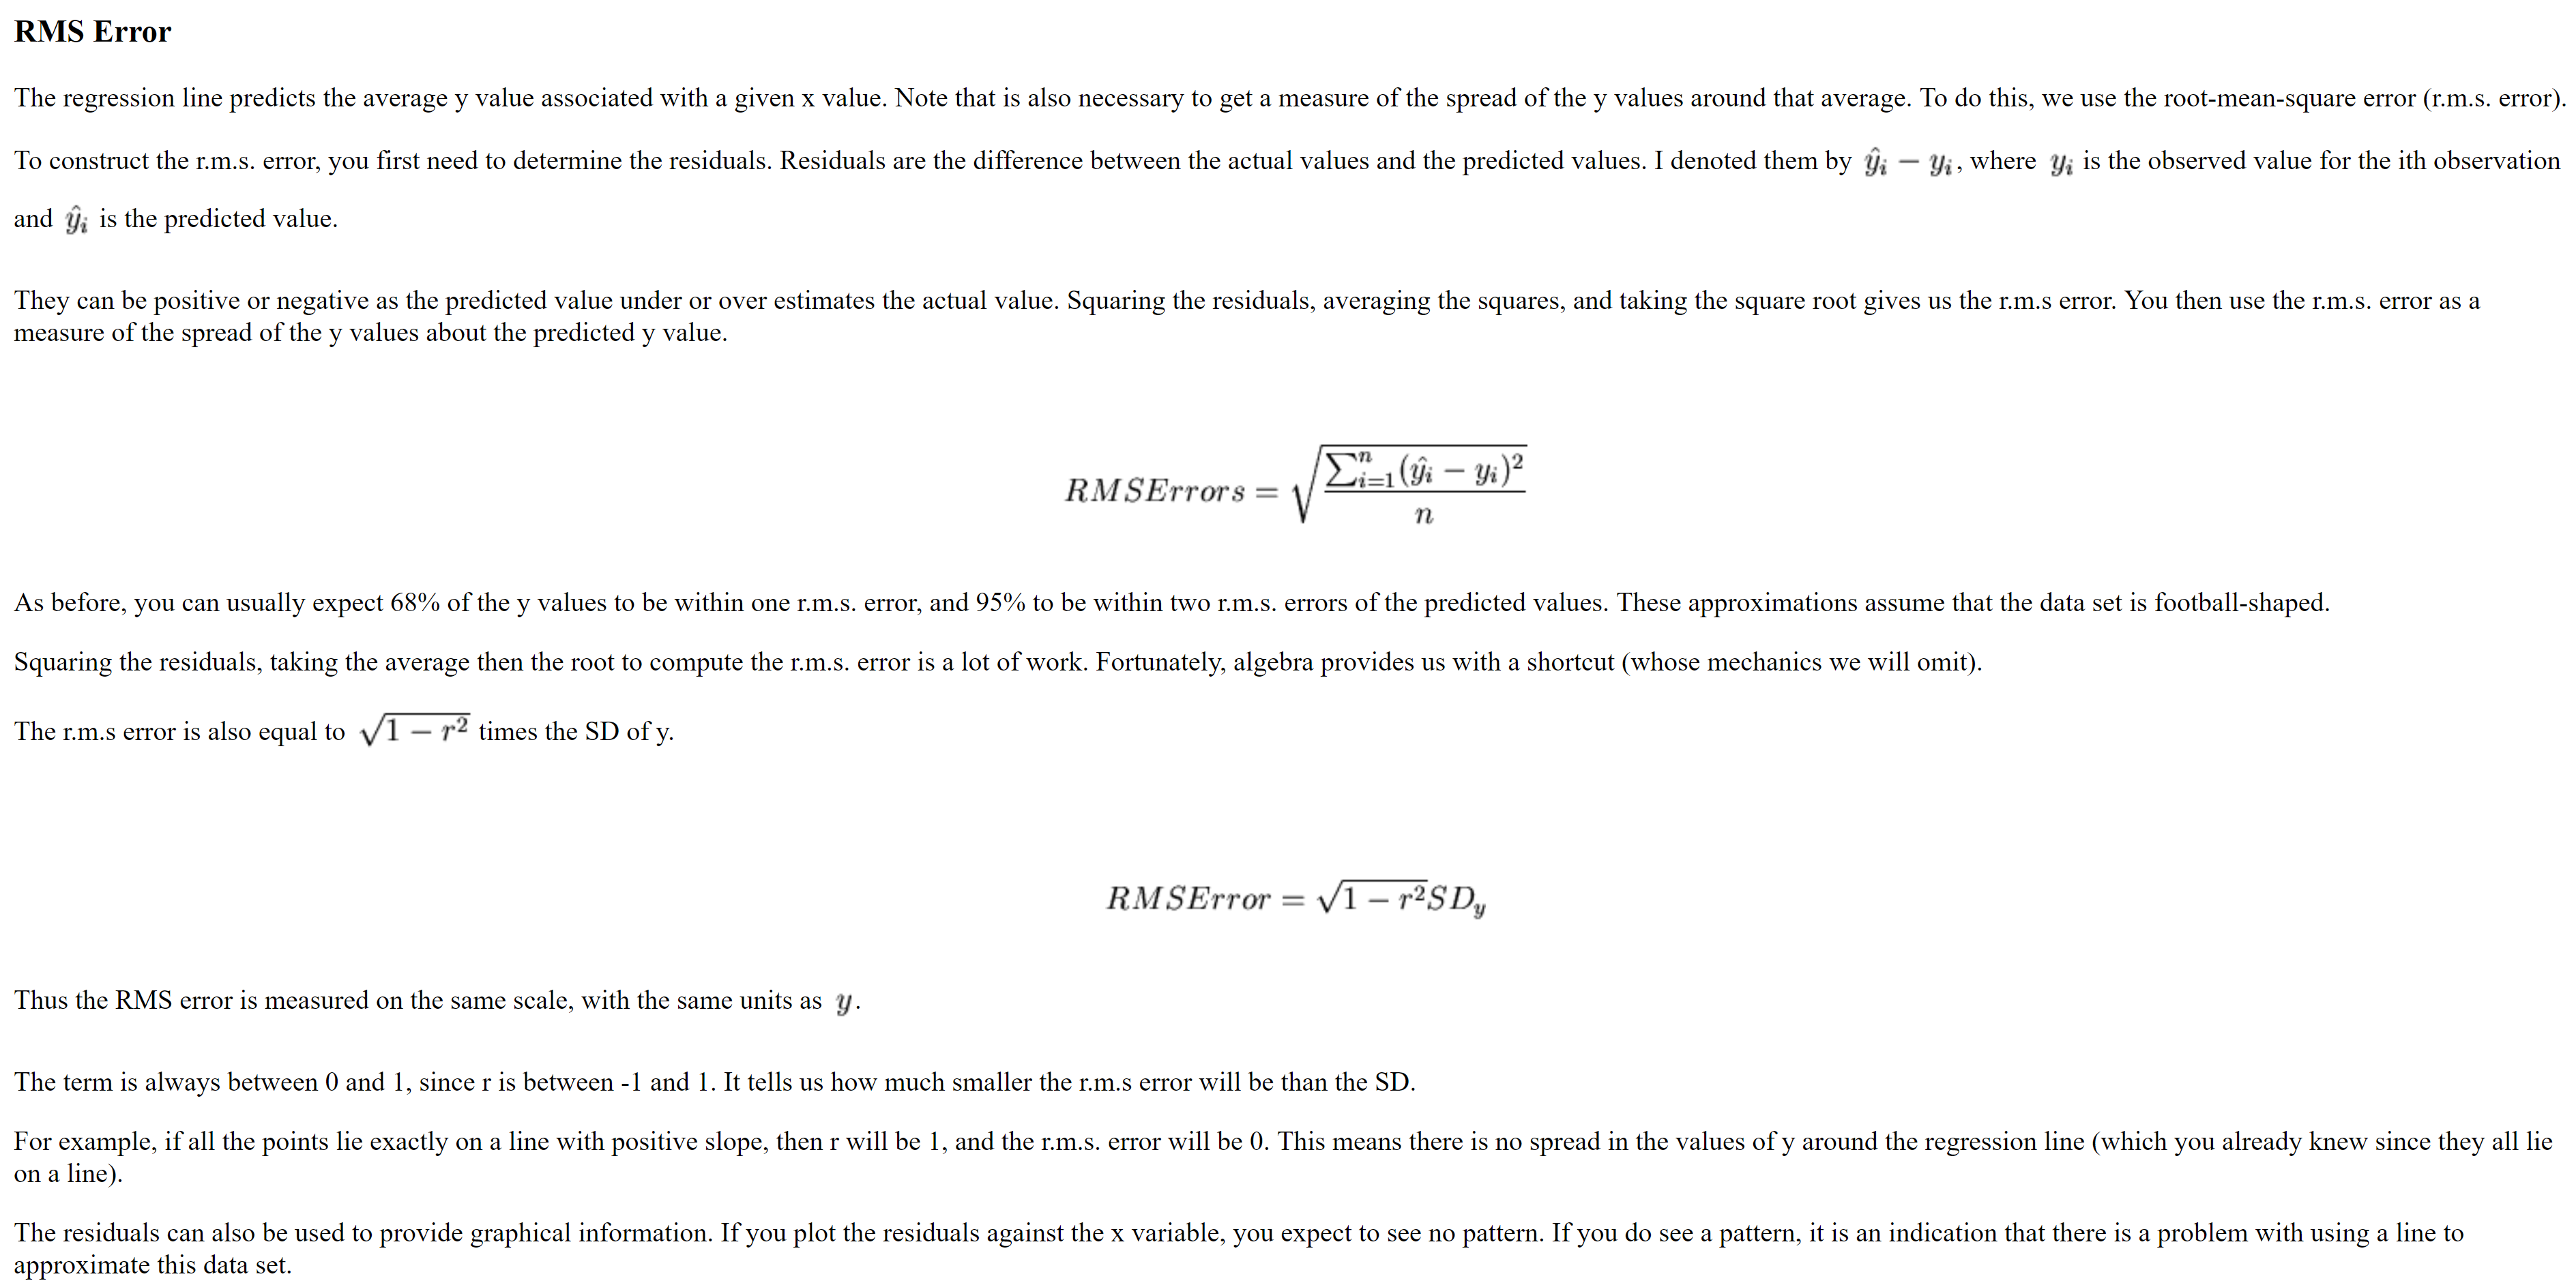

In [86]:
# Mean Square Error
mean_square_regression = mean_squared_error(Result['actual'], Result['uber_pred'])
mean_square_random_forest = mean_squared_error(Result['actual'],Result['uber_pred_rf'])

print ('Mean Square Error of Linear Regression: ', mean_square_regression)
print ('Mean Square Error of Random Forest: ', mean_square_random_forest)

Mean Square Error of Linear Regression:  1.3769777711337131e-05
Mean Square Error of Random Forest:  1.2894851639293489e-05


In [87]:
# Root Mean Square Error
root_mean_square_regression = sqrt(mean_squared_error(Result['actual'], Result['uber_pred']))
root_mean_square_random_forest = sqrt(mean_squared_error(Result['actual'],Result['uber_pred_rf']))

print ('Root Mean Square Error of Linear Regression: ', root_mean_square_regression)
print ('Root Mean Square Error of Random Forest: ', root_mean_square_random_forest)

Root Mean Square Error of Linear Regression:  0.0037107651113129124
Root Mean Square Error of Random Forest:  0.003590940216613678
